Data from Kaggle

In [1]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# daatset api
!kaggle competitions download -c cifar-10

 99% 710M/715M [00:03<00:00, 173MB/s]
100% 715M/715M [00:03<00:00, 208MB/s]


In [5]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [6]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


.7z format breakdown

In [7]:
!pip install py7zr

In [8]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [9]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [10]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [11]:
filenames = os.listdir('/content/train')

In [12]:
len(filenames)

50000

Label for Y

In [13]:
labels_df = pd.read_csv('/content/trainLabels.csv')

In [14]:
labels_df.shape

(50000, 2)

In [15]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [16]:
labels_df['label'].value_counts()

,count
label,
frog,5000
truck,5000
deer,5000
automobile,5000
bird,5000
horse,5000
ship,5000
cat,5000
dog,5000


In [17]:
labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [18]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


Creating X

In [19]:
import os

# List of image filenames
filenames = filenames
directory = '/content/train'

x = []


# Loop through filenames
for fname in filenames:
    x.append(os.path.join(directory, fname))

In [21]:
x[0]

'/content/train/18025.png'

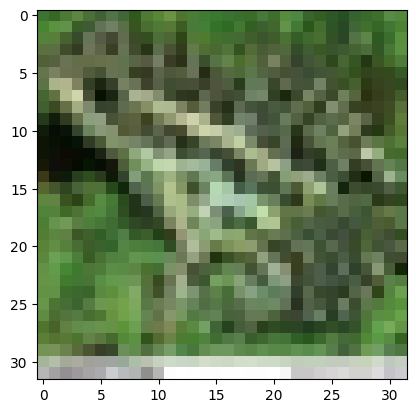

In [22]:
# display dog image
img = mpimg.imread(x[0])
imgplt = plt.imshow(img)
plt.show()

Convert image to numpy using cv2

In [24]:
# Load and convert images to array
import cv2
x_numpy = np.asarray([
    cv2.resize(cv2.imread(file), (32, 32)) for file in x
    if cv2.imread(file) is not None
], dtype=np.float32) / 255.0  # normalize to 0-1

In [26]:
x_numpy.shape

(50000, 32, 32, 3)

In [28]:
X = x_numpy
Y = np.array(labels)
print(X.shape,Y.shape)

(50000, 32, 32, 3) (50000,)


Train Test Split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
X_train[0] # Already scaled